## NORMALIZACION

---

In [4]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
from scipy import stats
import researchpy as rp
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,15) 

In [5]:
df= pd.read_csv('../files/endesarrollo_1.csv', index_col=0)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:


---

### 1) Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste


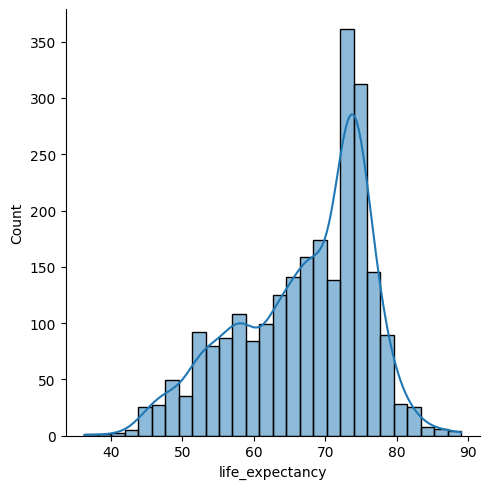

In [6]:
sns.displot(df['life_expectancy'], kde = True);

`Por la forma que vemos que tiene la distribucion hemos decidido aplicar la normalizacion con el metodo de Raiz Cuadrada`

In [7]:
df["life_raiz"] = df["life_expectancy"].apply(lambda x: math.sqrt(x))

In [8]:
df.head()

,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,measles,bmi,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,income_composition_of_resources,schooling,life_raiz
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,1154.0,19.1,8.16,65.0,0.1,584.259210,17.2,0.479,10.1,8.062258
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,492.0,18.6,8.18,62.0,0.1,612.696514,17.5,0.476,10.0,7.739509
2,Afghanistan,Developing,Asia,2013.0,59.9,268.0,66.0,0.01,430.0,18.1,8.13,64.0,0.1,631.744976,17.7,0.470,9.9,7.739509
3,Afghanistan,Developing,Asia,2012.0,59.5,272.0,69.0,0.01,2787.0,17.6,8.52,67.0,0.1,669.959000,17.9,0.463,9.8,7.713624
4,Afghanistan,Developing,Asia,2011.0,59.2,275.0,71.0,0.01,3013.0,17.2,7.87,68.0,0.1,63.537231,18.2,0.454,9.5,7.694154


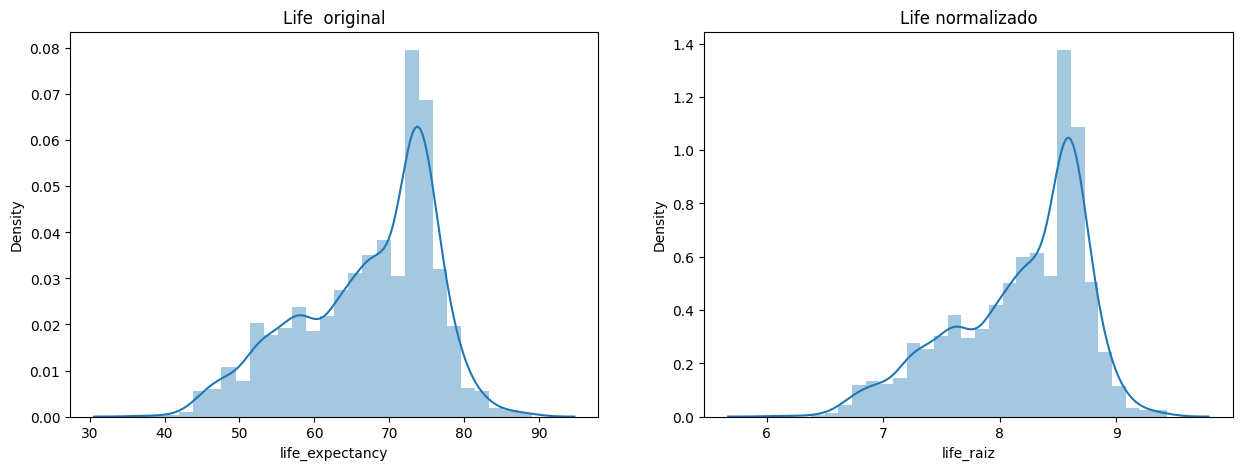

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Life  original')
axes[1].set_title('Life normalizado')

sns.distplot(df["life_expectancy"] ,ax = axes[0])
sns.distplot(df["life_raiz"], ax = axes[1]);

In [10]:
stats.shapiro(df["life_raiz"])

ShapiroResult(statistic=0.9364919066429138, pvalue=6.4817618966205735e-31)

`Vemos que los datos siguen sin ser normales`

---

`Probamos el metodo Box-cox para ver si de esta forma se normaliza`

In [11]:
df['life_box'], lambda_ajustada = stats.boxcox(df['life_expectancy'])

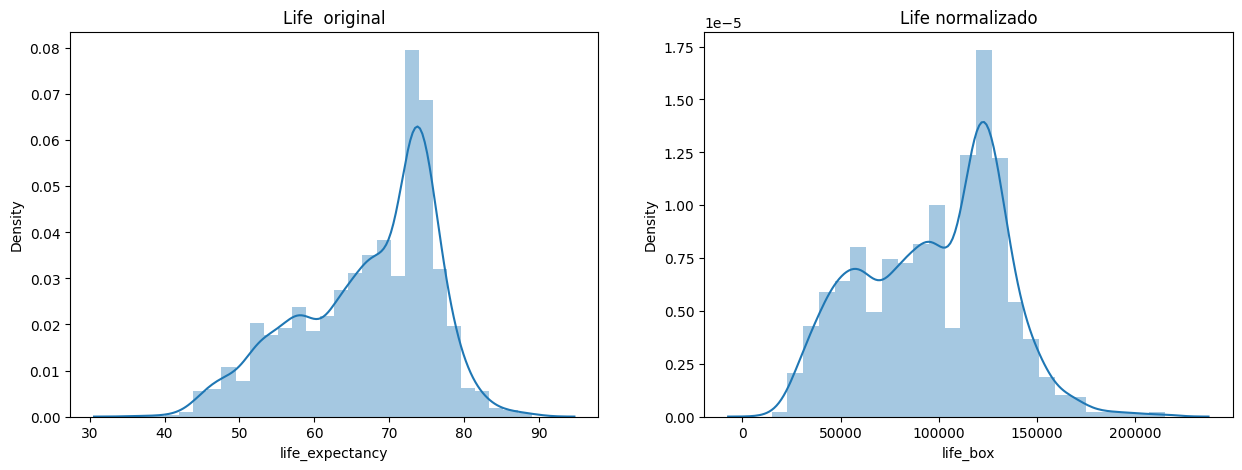

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Life  original')
axes[1].set_title('Life normalizado')

sns.distplot(df["life_expectancy"] ,ax = axes[0])
sns.distplot(df["life_box"], ax = axes[1]);

In [13]:
stats.shapiro(df["life_box"])

ShapiroResult(statistic=0.9730455279350281, pvalue=6.5903418106660386e-21)

In [14]:
stats.shapiro(df["life_expectancy"])

ShapiroResult(statistic=0.9485048055648804, pvalue=2.829572663175081e-28)

`Vemos que los datos siguen sin ser normales`

`En base a los resultados decidimos quedarnos con los resultados del metodo Box-cox ya que logro mejores aproximaciones.

In [15]:
df.drop(columns=['life_raiz'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

country                            0
status                             0
continente                         0
year                               0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
measles                            0
bmi                                0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
thinness__1-19_years               0
income_composition_of_resources    0
schooling                          0
life_box                           0
dtype: int64

---

### 2) Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings


In [16]:
df.to_csv('../files/endesarrollo_normalizar.csv')